# 📬 Indian Postage Stamp Archive – Exploratory Data Analysis

## 📌 Project Overview
This project analyzes a custom dataset of ~3000 official Indian postage stamps issued between 1962 and 2025.  
The dataset contains information such as **title, denomination, category, date of issue, and image links**.

The goal is to:
- Explore historical trends in Indian stamp issuance.
- Analyze patterns by **year, decade, category, and denomination**.
- Provide visual insights for historical and philatelic research.

## 📂 Dataset Description
**Columns:**
- `title` – Name of the stamp.
- `denomination` – Original denomination value (nP / Rs).
- `category` – Stamp category (available for stamps up to year 2000).
- `date_of_issue` – Official release date.
- `Image` – Link to the stamp image.

**Dataset Size:** 2946 rows × 7 columns  
**Time Range:** 1962–2025

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Visual settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Load dataset
url = 'https://raw.githubusercontent.com/Ankkman/Indian-stamp-archive-analysis/refs/heads/main/data/stamps.csv'
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
df.head(5)


Dataset shape: (2945, 6)


,raw_text,title,denomination,category,date_of_issue,Image
0,A commemorative postage stamp on PANCHAYATI R...,PANCHAYATI RAJ,15 nP,Institution,26 Jan 1962,https://postagestamps.gov.in/Images/Stamps1962...
1,A commemorative postage stamp on GAUHATI REFI...,GAUHATI REFINERY,15 nP,Institution,01 Jan 1962,https://postagestamps.gov.in/Images/Stamps1962...
2,A commemorative postage stamp on UNIVERSAL DE...,UNIVERSAL DECLARATION OF HUMAN RIGHTS 15TH ANN...,15 nP,Event,10 Dec 1963,https://postagestamps.gov.in/Images/Stamps1963...
3,A commemorative postage stamp on CHILDREN'S D...,CHILDREN'S DAY 14-11-63,15 nP,Event,14 Nov 1963,https://postagestamps.gov.in/Images/Stamps1963...
4,A commemorative postage stamp on WILD LIFE SE...,WILD LIFE SERIES : GAUR,10 nP,Thematic,07 Oct 1963,https://postagestamps.gov.in/Images/Stamps1963...


In [ ]:
# STEP 1: DATE & YEAR CLEANING


# Ensure 'date_of_issue' is treated as a string
df['date_of_issue'] = df['date_of_issue'].astype(str).replace('nan', np.nan)

# Parse with pandas datetime
df['date_parsed'] = pd.to_datetime(df['date_of_issue'], errors='coerce', dayfirst=True)

# Fallback year extraction from text
import re
def extract_year_from_text(x):
    if pd.isna(x):
        return np.nan
    m = re.search(r'(19|20)\d{2}', str(x))
    return int(m.group(0)) if m else np.nan

# Fill missing year values
df['year'] = df['date_parsed'].dt.year
df['year'] = df['year'].fillna(df['date_of_issue'].apply(extract_year_from_text)).astype('Int64')

# Create decade column
df['decade'] = (df['year'] // 10) * 10

print("✅ Years extracted for", df['year'].notna().sum(), "out of", len(df), "rows.")
df[['date_of_issue', 'date_parsed', 'year', 'decade']].head()


✅ Years extracted for 2944 out of 2945 rows.


,date_of_issue,date_parsed,year,decade
0,26 Jan 1962,1962-01-26,1962,1960
1,01 Jan 1962,1962-01-01,1962,1960
2,10 Dec 1963,1963-12-10,1963,1960
3,14 Nov 1963,1963-11-14,1963,1960
4,07 Oct 1963,1963-10-07,1963,1960


In [ ]:
# STEP 2: DENOMINATION CLEANING


def clean_denomination(value):
    if pd.isna(value):
        return np.nan
    num = re.findall(r"[\d\.]+", str(value))
    return float(num[0]) if num else np.nan

df['denomination_clean'] = df['denomination'].apply(clean_denomination)

print("Unique denominations (raw):", df['denomination'].nunique())
print("Unique denominations (clean numeric):", df['denomination_clean'].nunique())
df[['denomination', 'denomination_clean']].head(10)


Unique denominations (raw): 78
Unique denominations (clean numeric): 43


,denomination,denomination_clean
0,15 nP,15.0
1,15 nP,15.0
2,15 nP,15.0
3,15 nP,15.0
4,10 nP,10.0
5,15 nP,15.0
6,30 nP,30.0
7,50 nP,50.0
8,INR 1.00,1.0
9,15 nP,15.0


In [ ]:
# STEP 3: MISSING VALUES SUMMARY
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)


category              1612
date_parsed              5
title                    3
decade                   1
date_of_issue            1
denomination             1
denomination_clean       1
year                     1
raw_text                 0
Image                    0
dtype: int64


In [ ]:
# STEP 4: SAVE CLEANED VERSION

df.to_csv('cleaned_stamps_step1.csv', index=False)
print("💾 Saved: cleaned_stamps_step1.csv")


💾 Saved: cleaned_stamps_step1.csv


## Number of Stamps Issued per Year

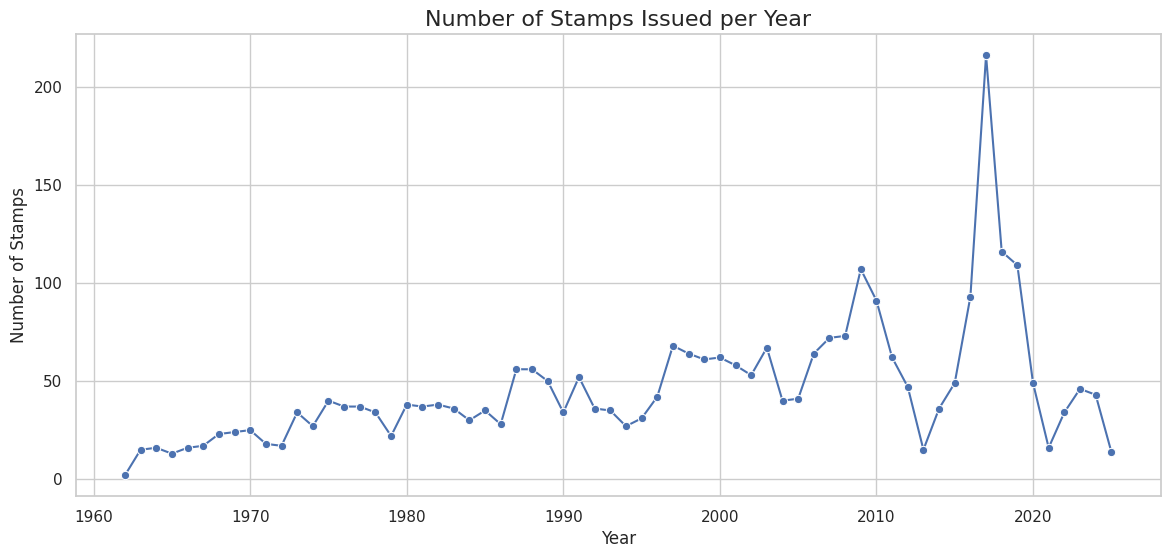

In [ ]:
# Chart 1: Stamps per year

plt.figure(figsize=(14,6))
year_counts = df['year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Stamps Issued per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Stamps')
plt.grid(True)
plt.show()


**Insights:**
- Early years (1960s) saw relatively low stamp issuance.
- Gradual increase over decades, with spikes during special events.
- Largest spike observed in **2017** (over 200 stamps).

## Number of Stamps Issued per Decade

/tmp/ipython-input-2577934486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values, palette='viridis')


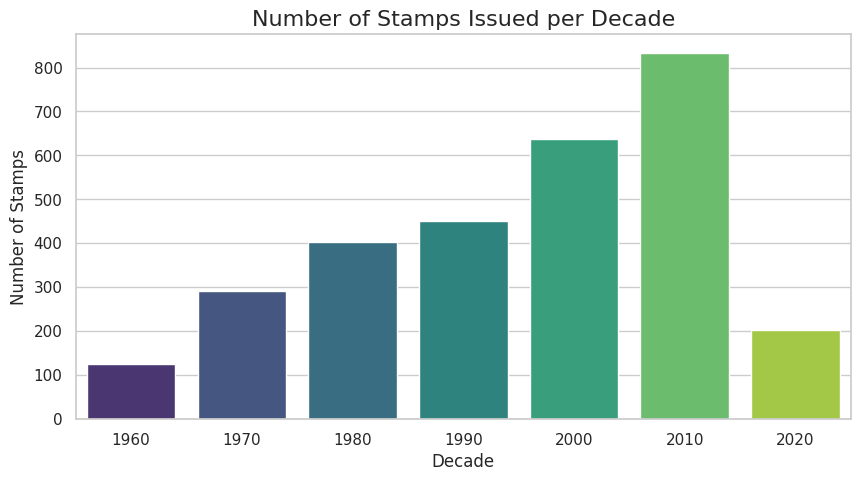

In [ ]:
# Chart 2: Stamps per decade

plt.figure(figsize=(10,5))
decade_counts = df['decade'].value_counts().sort_index()
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values, palette='viridis')
plt.title('Number of Stamps Issued per Decade', fontsize=16)
plt.xlabel('Decade')
plt.ylabel('Number of Stamps')
plt.show()


**Insights:**
- Steady growth from 1960s through 2000s.
- 2010s saw the highest issuance, driven by commemorative series.

## Stamp Categories (Up to Year 2000)

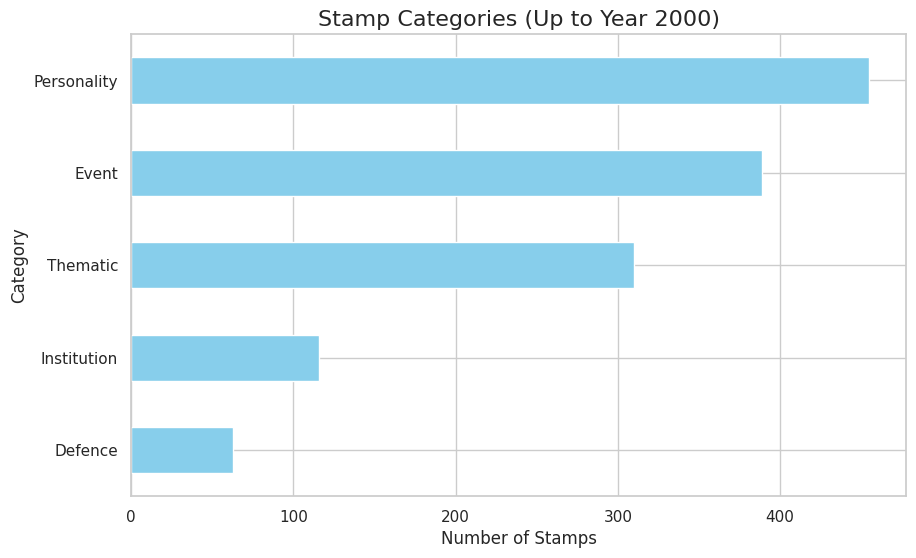

In [ ]:
#Category Distribution

# Filter only stamps with category and year <= 2000
df_cat = df[(df['year'].notna()) & (df['year'] <= 2000) & (df['category'].notna())]

# Count by category
cat_counts = df_cat['category'].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10,6))
cat_counts.plot(kind='barh', color='skyblue')
plt.title('Stamp Categories (Up to Year 2000)', fontsize=16)
plt.xlabel('Number of Stamps')
plt.ylabel('Category')
plt.show()


**Insights:**
- `Event` and `Personality` categories dominate.
- Certain categories are decade-specific, reflecting historical themes.

# Category vs Decade Heatmap

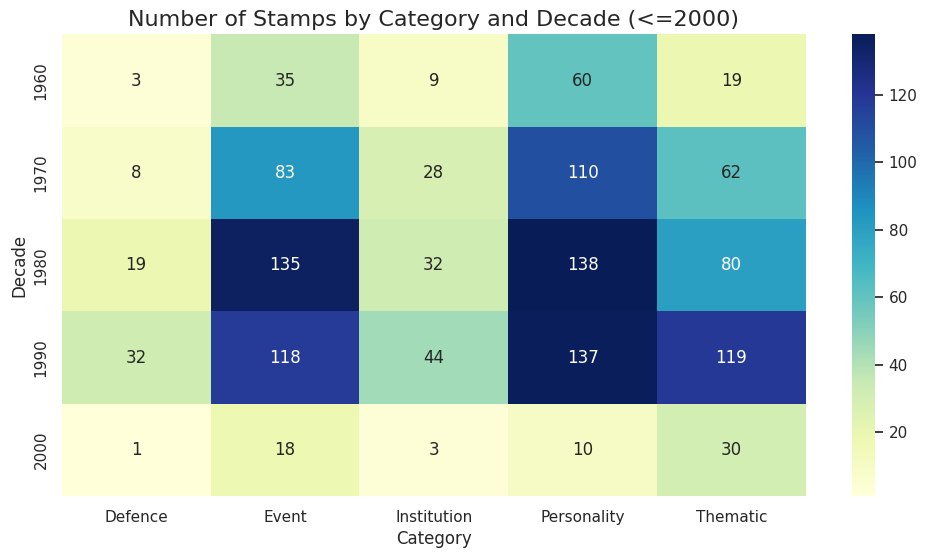

In [ ]:
# Category vs Decade Heatmap

# Create crosstab for category vs decade
cat_decade_ct = pd.crosstab(df_cat['decade'], df_cat['category'])

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cat_decade_ct, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Number of Stamps by Category and Decade (<=2000)', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Decade')
plt.show()


## Denomination Analysis

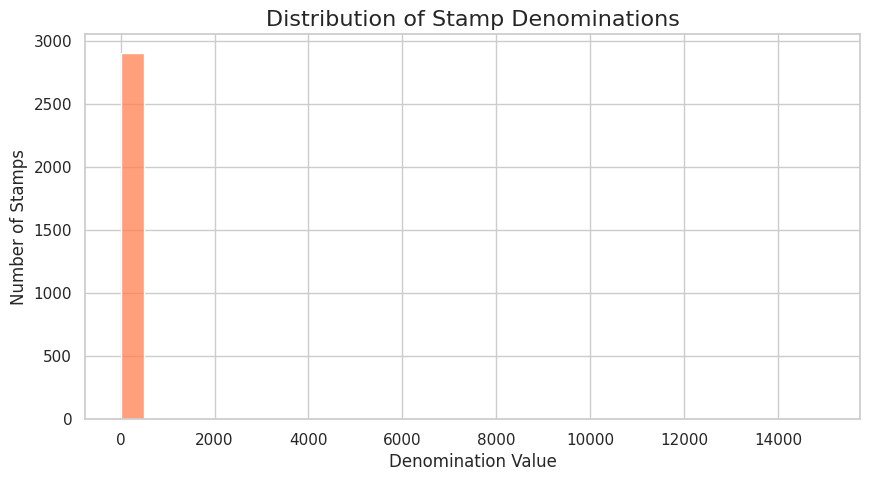

/tmp/ipython-input-3948027153.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_denoms.index, y=top_denoms.values, palette='muted')


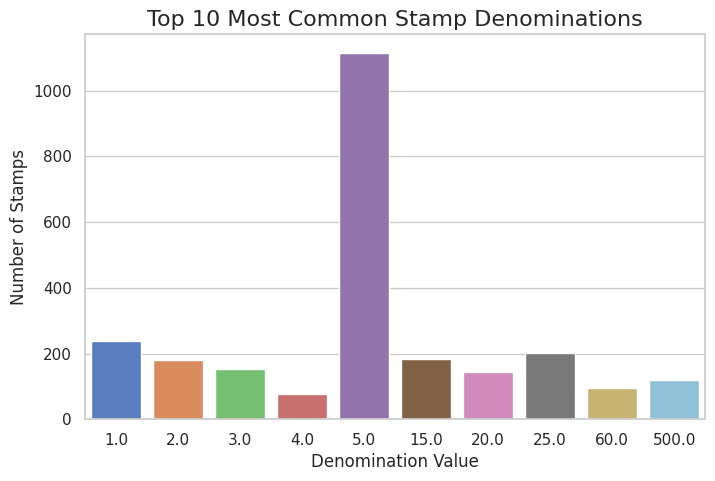

In [ ]:
# Denomination Analysis

# Filter only rows with valid numeric denomination
df_denom = df[df['denomination_clean'].notna()]

# Histogram of denominations
plt.figure(figsize=(10,5))
sns.histplot(df_denom['denomination_clean'], bins=30, kde=False, color='coral')
plt.title('Distribution of Stamp Denominations', fontsize=16)
plt.xlabel('Denomination Value')
plt.ylabel('Number of Stamps')
plt.show()

# Top 10 most common denominations
top_denoms = df_denom['denomination_clean'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_denoms.index, y=top_denoms.values, palette='muted')
plt.title('Top 10 Most Common Stamp Denominations', fontsize=16)
plt.xlabel('Denomination Value')
plt.ylabel('Number of Stamps')
plt.show()




**Insights:**
- Most denominations fall under low values (≤ 5 Rs), suited for postal needs.
- 15 nP was common in earlier decades.


## Top Issuing Years

/tmp/ipython-input-2387940341.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_years.index, y=top_years.values, palette='viridis')


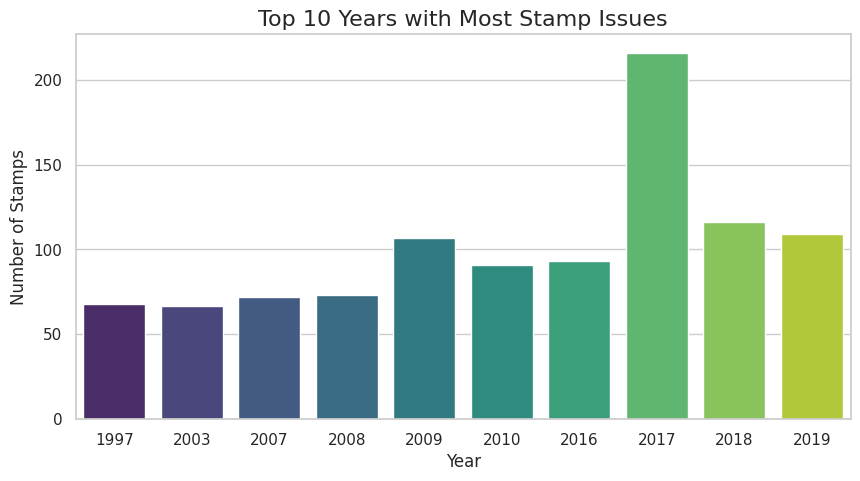

Top 10 Years with Most Stamp Issues:
year
1997     68
2003     67
2007     72
2008     73
2009    107
2010     91
2016     93
2017    216
2018    116
2019    109
Name: count, dtype: Int64


In [ ]:
# Top Issuing Years

# Count stamps per year
top_years = df['year'].value_counts().head(10).sort_index()

# Bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_years.index, y=top_years.values, palette='viridis')
plt.title('Top 10 Years with Most Stamp Issues', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Stamps')
plt.show()

print("Top 10 Years with Most Stamp Issues:")
print(top_years)


**Peak Year:** 2017 with over 200 stamps issued.  
Likely due to large commemorative series and special events.

## 🎯 Key Learnings
- India’s stamp issuance has grown significantly since the 1960s.
- Historical events and anniversaries strongly influence issuance spikes.
- Categories and denominations offer insight into postal and economic history.